# TD 3 : Le modèle Leaky Integrate-and-Fire (LIF)
---

In [1]:
# import necessary modules for numerics and plotting
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Le modèle Integrate-and-Fire 

La dynamique sous-seuil d'un neurone "Integrate-and-Fire" est décrit par l'équation 
$$\tau \frac{dV}{dt} = -V + RI.$$
Ici, $V$ est le potentiel de la membrane, $\tau$ est la constante de temps de la membrane, $R$ la résistance d'entrée, et $I$ représente un courant injecté dans le neurone. Pour faire simple, tous les potentiels sont mésurés rélatif au potentiel de repos $E_L$, qui pour cette raison n'apparaît plus dans l'équation. 

Chaque fois que le potentiel excède un seuil $V_{\rm seuil}$, on considère que le neurone emet un potentiel d'action, et le potentiel membranaire est remis à une valeur de "reset", $V\to V_{\rm reset}$.

Considérons les paramètres suivants : $\tau=20$ ms et $R=1$ MOhm pour la dynamique sous-seuil, et $V_{\rm seuil}=20$ mV avec $V_{\rm reset}=0$ mV pour le mécanisme de décharge. 

Remarque : Si nous allons spécifier le courant $I$ en nA, nous pouvons calculer le produit $R*I$ sans dévoir transformer des unités, puisque MOhm x nA = mV. 



## 1.1 Solution analytique de la dynamique sous-seuil du modèle Integrate-and-Fire

Quel est le potentiel de la membrane stationnaire - ou le point fixe - pour $t\rightarrow \infty$ si on considère *uniquement la dynamique sous-seuil* spécifiée ci-dessus, c'est-à-dire en faisant abstraction du mécanisme de décharge ? 

Vérifiez que $$V(t) = RI + (V_0 - RI) \exp(-t/\tau)$$ est une solution de l'équation différentielle donnée plus haut, avec la condition initiale $V(t=0) = V_0$ et si on considère que le courant $I$ est constant dans le temps. 

**Indice**: Rappelez-vous que $\frac{d}{dt} \left( e^{f(t)} \right) = e^{f(t)} \frac{df(t)}{dt}$

In [2]:
# calcul et réponses sur papier

**Solution :** 
$$\frac{dV}{dt} = \frac{d}{dt} \left[RI + (V_0 - RI) e^{-t/\tau}\right] =  \ldots  $$ 


In [5]:
# Plottez la solution pour les paramètres données plus haut 
# et la valeur initiale V0 = Vreset

## 1.2 L'activité de décharge du neurone Integrate-and-Fire

Dans le modèle Integrate-and-Fire, un potentiel d'action est déclenché lorsque le potentiel de membrane atteint un seuil $V_{\rm seuil}$. Le potentiel est remis à $V \rightarrow V_{\rm reset}$ après le potentiel d'action. 

**Dans quelle condition, c'est-à-dire pour quel courant injecté, le neurone déclenche-t-il des potentiels d'action ?**

Veuillez dériver l'expression analytique du taux de décharge $f(t)$ en fonction de l'input externe $I$. 

**Indice :** Calculez d'abord combien de temps $T$ il faut pour passer de $V(t=0)=V_{\rm reset}$ à $V(T)=V_{\rm seuil}$. Ce temps $T$ entre deux spikes dépend du courant injecté, $T=T(I)$. Le taux de décharge en fonction de l'input est alors donné par $f(I) = 1/T(I)$. Tracez le taux de décharge $f$ en fonction de l'entrée $I$.

In [6]:
# calcul et réponses sur papier

**Solution :** 
$$V_{\rm seuil} = V(T)  =  \ldots $$


Le potentiel ne dépasse pas le seuil que si $V_{\infty} = RI > V_{seuil}$ ! Dans le cas contraire, le potential $V$ tend vers $V_{\infty}<V_{seuil}$ et jamais le seuil n'est franchi. Pour déterminer le temps $T$ entre un reset et le prochain PA, avec $RI$ suffisamment grand :

$$V_{\rm seuil} = RI + (V_{\rm reset} - RI) e^{-T/\tau} $$

$$\Rightarrow\ \ e^{-T/\tau} = \frac{V_{\rm seuil} - RI}{V_{\rm reset} - RI}  $$

$$\Rightarrow\ \ T = -\tau \log \frac{V_{\rm seuil} - RI}{V_{\rm reset} - RI}  $$



In [10]:
# Plottez la courbe f-I du LIF avec 
# les paramètres choisis

Vreset = 0 # mV
Vseuil = 20. # mV
R = 1. # MOhm
tau = 20. # ms

def f(I):
    """Taux de décharge pour LIF en fonction 
    du courant (en nA) avec paramètres choisis.
    Retourne taux de décharge en Hz 
    pour paramètre tau donné en ms"""
    T = tau*np.log((R*I-Vreset)/(R*I-Vseuil))
    return 1e3/T

/var/folders/2x/1ky8h5cs7y79x75v9hy67r4r0000gp/T/ipykernel_20858/2293930561.py:14: RuntimeWarning: divide by zero encountered in divide
  T = tau*np.log((R*I-Vreset)/(R*I-Vseuil))
/var/folders/2x/1ky8h5cs7y79x75v9hy67r4r0000gp/T/ipykernel_20858/2293930561.py:14: RuntimeWarning: divide by zero encountered in log
  T = tau*np.log((R*I-Vreset)/(R*I-Vseuil))
/var/folders/2x/1ky8h5cs7y79x75v9hy67r4r0000gp/T/ipykernel_20858/2293930561.py:14: RuntimeWarning: invalid value encountered in log
  T = tau*np.log((R*I-Vreset)/(R*I-Vseuil))
/var/folders/2x/1ky8h5cs7y79x75v9hy67r4r0000gp/T/ipykernel_20858/4152197012.py:10: RuntimeWarning: divide by zero encountered in divide
  ax.plot(I, 1e3/f(I))


Text(0, 0.5, 'période T (ms)')

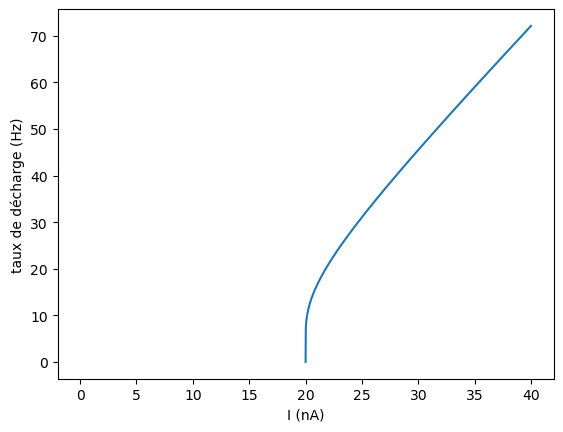

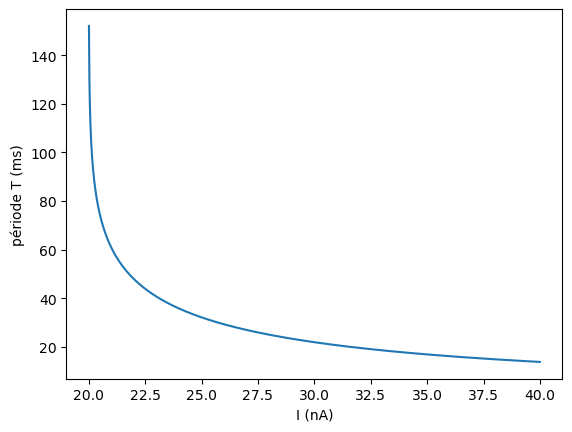

In [11]:
I = np.arange(0,40,0.01) # nA

fig, ax = plt.subplots()
ax.plot(I, f(I))
ax.set_xlabel('I (nA)')
ax.set_ylabel('taux de décharge (Hz)')


fig, ax = plt.subplots()
ax.plot(I, 1e3/f(I))
ax.set_xlabel('I (nA)')
ax.set_ylabel('période T (ms)')

## 1.3 Neurone Integrate-and-Fire avec période refractaire

Considérons maintenant un neurone avec une période réfractaire : Dans cette modification du modèle, le neurone n'intégre pas d'inputs pendant une période brève après l'émission d'un spike, similaire aux vrais neurones. Supposons que la période réfractaire dure un temps $D$. Comment le taux de décharge $f(I)$ change-t-il avec une période réfractaire de $D=5$ ms ? Quelle est la nouvelle expression pour $f(I)$ ? Tracez $f$ en fonction de $I$. 

**Remarque :** La dynamique sous-seuil, une fois la période refractaire passée, est identique au cas sans période refractaire, c'est-à-dire n'est pas modifiée, et un spike est toujours déclenché quand $V>V_{\rm seuil}$.

**Indice :** Dessinez d'abord un croquis de la dynamique du potentiel membranaire pour avoir une meilleure idée de la façon dont $D$ affecte $T$. 

In [ ]:
# calcul et réponses sur papier

**Réponse :**

$$T_{\rm avec} = T_{\rm sans} + D \Rightarrow\ \ f_{\rm avec}(I) = \frac{1}{T_{\rm avec}} = \ldots  $$

$$f_{\rm avec}(I) = \frac{1}{\tau \log\frac{RI-V_{\rm reset}}{RI-V_{\rm seuil}} + D}$$


In [ ]:
# Plottez la courve f-I pour le paramètres choisis
# pour D=0 ms (le cas avant, sans période réfractaire)
# et D=5 ms.

def f_refr(I, D):
    """Taux de décharge pour LIF en fonction 
    du courant (en nA) avec paramètres choisis,
    avec période réfractaire D (en ms).
    Retourne taux de décharge en Hz 
    pour paramètre tau donné en ms"""
    T = tau*np.log((R*I-Vreset)/(R*I-Vseuil))
    return 1e3/(T+D)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


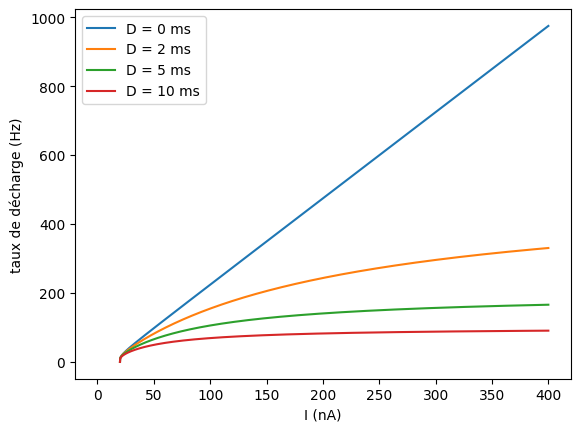

In [ ]:
Ds = [0, 2, 5, 10] # in ms

fig, ax = plt.subplots()
for D in Ds:
    ax.plot(I, f_refr(I, D), label='D = %g ms'%D)
ax.set_xlabel('I (nA)')
ax.set_ylabel('taux de décharge (Hz)')
ax.legend()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


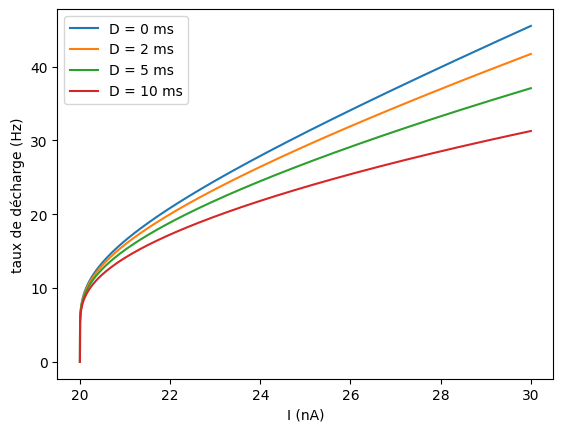

In [ ]:
I = np.arange(20, 30, 0.0001)

fig, ax = plt.subplots()
for D in Ds:
    l, = ax.plot(I, f_refr(I, D), label='D = %g ms'%D)
    #if D>0:
    #    ax.axhline(1e3/D, lw=1, ls='--', color=l.get_color())
ax.set_xlabel('I (nA)')
ax.set_ylabel('taux de décharge (Hz)')
ax.legend()

## 1.4 Intégration numérique du modèle Integrate-and-Fire (avec décharge !)

La semaine précédente, nous avons utilisé la méthode d'Euler pour résoudre des équations différentielles. Nous pouvons utiliser cette même technique pour résoudre la dynamique sous-seuil d'un neurone LIF (Leaky Integrate-and-Fire), en rajoutant un mécanisme de détection de spike et de reset.


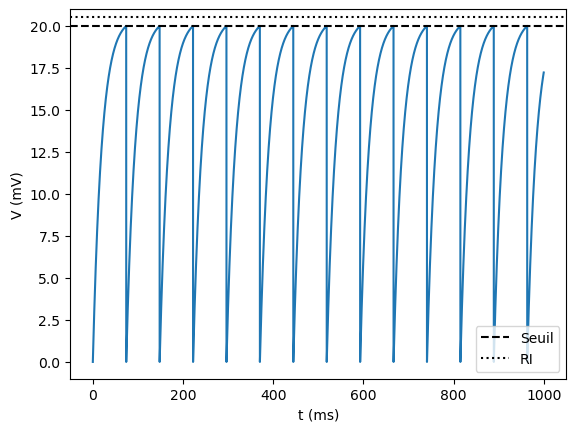

In [13]:
# Discretization of time
dt = 0.1 # ms
T = 1000 # ms 
t = np.arange(0,T,dt)
nt = len(t)

# Definition of the dynamics
# (function returning dV/dt)
def dVdt(V,t,I):
    return (-V+R*I)/tau


# Iterative integration of 
# the subthreshold dynamics,
# COMBINED WITH threshold
# crossing detection!

# créer un array vide pour la solution
V = np.zeros(nt)

# choisir la valeur initiale 
# (peut être laissé à 0 bien sûr)
V[0] = Vreset

# choisir courant
I = 20.5 # nA

spiketimes = []

# itération dans le temps
for i in range(nt-1):
    # dynamique sous-seuil
    V[i+1] = V[i] + dt*dVdt(V[i],None,I)

    # vérifier si le seuil a été franchi !
    if V[i+1] > Vseuil:
        V[i+1] = Vreset
        spiketimes.append(dt*(i+1))

fig, ax = plt.subplots()
ax.plot(t, V)
ax.axhline(Vseuil, ls='--', c='k', label='Seuil')
ax.axhline(R*I, ls=':', c='k', label='RI')
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()


In [ ]:
len(spiketimes)/T

0.016


# 2. Décharge irrégulière dans le modèle Integrate-and-Fire

Ajoutons une entrée de bruit à l'équation du neurone Integrate-and-Fire ci-dessus
$$\tau \frac{dV}{dt} = -V + RI + \sigma \sqrt{\tau} \xi(t),$$
où $\sigma$ détermine l'amplitude du bruit et $\xi(t)$ est un processus de bruit blanc gaussien avec une densité de variance unitaire et moyenne zéro. Avec le terme de bruit, c'est désormais une _**équation différentielle stochastique**_.

Le terme de bruit peut par ex. représenter :     
* la stochasticité d'ouverture et de fermeture des canaux ioniques,
* le bruit synaptique (fiabilité de la transmission synaptique),
* les entrées synaptiques externes (inconnues et/ou variables entre les essais).

 
Dans la forme discrétisée telle que nous l'utilisons pour la méthode d'Euler, l'équation devient

$$V_{i+1} = V_i + \Delta t \left[\left(\frac{dV}{dt}\right)_{\rm det}(V_i, t_i) + \sigma\sqrt{\frac{1}{\Delta t \tau}} \eta_i\right],$$

où le premier terme $\left(\frac{dV}{dt}\right)_{\rm det}$ -- évalué à $t_i$ -- représente la dynamique déterministe du LIF, tandis que la stochasticité vient du deuxième terme, où $\eta_i$ est un nombre aléatoire tiré d'une distribution Gaussienne normalisée, avec moyenne zéro et écart-type 1. 

**Indice :** Tirez des nombres aléatoires Gaussiens avec `np.random.normal()`. 


## 2.1 Intégration numérique d'une équation différentielle stochastique : LIF avec  bruit

Écrivez un schéma d'intégration numérique de l'équation différentielle ci-dessus. Utilisez la méthode Euler avec un largeur de pas de temps de $0.1$ ms et intégrez pendant 20 secondes. Enregistrez les temps de spikes et calculez le coefficient de variation après l'intégration. Essayez d'obtenir un $CV$ de 1 à un taux de décharge de 1 spk/sec en variant $I$ et $\sigma$. Tracer le potentiel de la membrane pendant une période de 20 sec. Inspectez l'histogramme de la distribution ISI.  

In [29]:
# Code pour l'intégration Euler

# Discretization of time
dt = 0.1 # ms
T = 1000 # ms 
t = np.arange(0,T,dt)
nt = len(t)

# créer un array vide pour la solution
V = np.zeros(nt)

# choisir la valeur initiale 
# (peut être laissé à 0 bien sûr)
V[0] = Vreset

# choisir courant
# --> valeur moyenne I0 (constant) et amplitude des fluctuations sigma
I0  = 18.5 
sigma = 1.


spiketimes = []

# itération dans le temps
for i in range(nt-1):
    # 1. dynamique sous-seuil 
    # 1.a partie déterministe
    V[i+1] = V[i] + dt*dVdt(V[i],None,I0)
    
    # 1.b partie stochastique!
    
    # à chaque tour, tirer un nouveau nombre aléatoire
    eta = np.random.normal()
    
    # Nota bene : c'est juste le troisième terme qu'il faut 
    # encore rajouter à V[i+1]
    V[i+1] += sigma*np.sqrt(dt/tau)*eta

    # vérifier si le seuil a été franchi !
    if V[i+1] > Vseuil:
        V[i+1] = Vreset
        spiketimes.append(dt*(i+1))


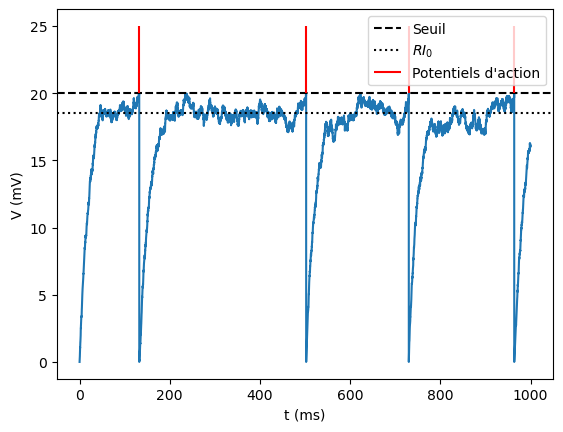

In [30]:
# Plottez le potentiel de membrane V(t)
# avec les spikes superposés pour les
# valeurs de I et de sigma choisies

fig, ax = plt.subplots()
ax.plot(t, V)
ax.axhline(Vseuil, ls='--', c='k', label='Seuil') 
ax.axhline(R*I0, ls=':', c='k', label='$RI_0$')
ax.vlines(spiketimes, ymin=Vseuil, ymax=Vseuil+5,  
          color='r', label="Potentiels d'action") # <-- tirés rouges pour indiquer les PA
ax.set_xlabel('t (ms)')
ax.set_ylabel('V (mV)')
ax.legend()

In [ ]:
# Calculez le CV --> DM

In [ ]:
# Plottez l'histogramme des ISI --> DM